In [4]:
import os 
import pandas as pd
#from dotenv import load_dotenv
import nltk
#nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
from newsapi import NewsApiClient
from nltk.tokenize import word_tokenize, sent_tokenize 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer 
from string import punctuation 
import re
from collections import Counter
from nltk import ngrams
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib as mpl 
import spacy 
from spacy import displacy 
analyzer = SentimentIntensityAnalyzer()
%matplotlib inline
#load_dotenv()
#api_key = os.getenv('news_api')
newsapi = NewsApiClient(api_key='f11932a0208546549ec5406256150090')

In [5]:
inflation_headlines = newsapi.get_everything(
    q = 'inflation',
    from_param = '2022-02-29',
    to = '2022-04-01',
    language = 'en',
    sort_by = 'relevancy',
    page = 2
)

In [6]:
sentiments = []

for articles in inflation_headlines['articles']:
    try:
        text = articles['content']
        results = analyzer.polarity_scores(text)
        compound = results['compound']
        pos = results['pos']
        neu = results['neu']
        neg = results['neg']
        sentiments.append({
            'text': text, 
            'Compound': compound,
            'Positive': pos,
            'Neutral': neu,
            'Negative': neg,
        })
    except AttributeError:
        pass

inflation = pd.DataFrame(sentiments)
inflation.head()

,text,Compound,Positive,Neutral,Negative
0,"Posted \r\nFrom soaring prices for oil, metals...",0.0000,0.000,1.000,0.000
1,"SEOUL, March 11 (Reuters) - Round-up of South ...",0.3832,0.131,0.810,0.059
2,"WASHINGTON, March 10 (Reuters Breakingviews) -...",0.3400,0.074,0.926,0.000
3,By Reuters Staff\r\nMarch 3 (Reuters) - The Fe...,0.6597,0.141,0.859,0.000
4,"4. The Federal Reserve chair, Jerome Powell, s...",-0.6808,0.000,0.887,0.113


In [7]:
# inflation sentiment summary 
inflation.describe()

,Compound,Positive,Neutral,Negative
count,20.000000,20.000000,20.000000,20.000000
mean,-0.032920,0.055500,0.891400,0.053100
std,0.422177,0.058453,0.075887,0.054437
min,-0.735100,0.000000,0.755000,0.000000
25%,-0.355475,0.000000,0.838000,0.000000
50%,0.000000,0.049000,0.873500,0.064000
75%,0.323650,0.080000,0.939750,0.089250
max,0.659700,0.172000,1.000000,0.162000


In [8]:
interest_rates_headlines = newsapi.get_everything(
    q = 'interest rate',
    from_param = '2022-02-29',
    to = '2022-04-01',
    language = 'en',
    sort_by = 'relevancy',
    page = 2
)

In [9]:
sentiments = []

for articles in interest_rates_headlines['articles']:
    try:
        text = articles['content']
        results = analyzer.polarity_scores(text)
        compound = results['compound']
        pos = results['pos']
        neu = results['neu']
        neg = results['neg']
        sentiments.append({
            'text': text, 
            'Compound': compound,
            'Positive': pos,
            'Neutral': neu,
            'Negative': neg,
        })
    except AttributeError:
        pass

interest_rate = pd.DataFrame(sentiments)
interest_rate.head()

,text,Compound,Positive,Neutral,Negative
0,"BOGOTA, March 31 (Reuters) - Colombia's centra...",0.2023,0.085,0.852,0.062
1,"SHANGHAI, March 21 (Reuters) - China kept its ...",0.4588,0.088,0.912,0.000
2,"BANGKOK, March 30 (Reuters) - Thailand's centr...",0.3612,0.159,0.724,0.117
3,The Bank of England has increased interest rat...,0.6249,0.118,0.882,0.000
4,"KUALA LUMPUR, March 3 (Reuters) - Malaysia's c...",0.2263,0.091,0.846,0.063


In [10]:
# interest rate sentiment summary 
interest_rate.describe()

,Compound,Positive,Neutral,Negative
count,20.000000,20.000000,20.000000,20.000000
mean,0.241920,0.089050,0.867000,0.043900
std,0.332423,0.031274,0.065047,0.058849
min,-0.726900,0.052000,0.724000,0.000000
25%,0.089925,0.077750,0.829000,0.000000
50%,0.293750,0.083000,0.868500,0.000000
75%,0.458800,0.088000,0.917500,0.079000
max,0.709600,0.182000,0.948000,0.217000


In [11]:
oil_headlines = newsapi.get_everything(
    q = 'oil',
    from_param = '2022-02-29',
    to = '2022-04-01',
    language = 'en',
    sort_by = 'relevancy',
    page = 2
)

In [12]:
sentiments = []

for articles in oil_headlines['articles']:
    try:
        text = articles['content']
        results = analyzer.polarity_scores(text)
        compound = results['compound']
        pos = results['pos']
        neu = results['neu']
        neg = results['neg']
        sentiments.append({
            'text': text, 
            'Compound': compound,
            'Positive': pos,
            'Neutral': neu,
            'Negative': neg,
        })
    except AttributeError:
        pass

oil = pd.DataFrame(sentiments)
oil.head()

,text,Compound,Positive,Neutral,Negative
0,"SINGAPORE, March 4 (Reuters) - Oil prices rebo...",-0.0772,0.065,0.861,0.074
1,"LVIV, Ukraine March 7 (Reuters) - Ukrainian Pr...",-0.3182,0.000,0.924,0.076
2,,0.0000,0.000,0.000,0.000
3,"SINGAPORE, March 7 (Reuters) - Oil prices soar...",-0.2023,0.073,0.833,0.094
4,"DUBAI, March 3 (Reuters) - Iranian oil product...",0.1280,0.075,0.925,0.000


In [13]:
# oil sentiment summary 
oil.describe()

,Compound,Positive,Neutral,Negative
count,20.000000,20.000000,20.00000,20.000000
mean,-0.131155,0.048250,0.82960,0.072200
std,0.440030,0.053142,0.20378,0.062423
min,-0.855500,0.000000,0.00000,0.000000
25%,-0.512100,0.000000,0.82825,0.000000
50%,-0.139750,0.043500,0.87750,0.075000
75%,0.051350,0.073500,0.91650,0.094250
max,0.680800,0.166000,1.00000,0.233000


In [14]:
gas_headlines = newsapi.get_everything(
    q = 'gas',
    from_param = '2022-02-29',
    to = '2022-04-01',
    language = 'en',
    sort_by = 'relevancy',
    page = 2
)

In [15]:
sentiments = []

for articles in gas_headlines['articles']:
    try:
        text = articles['content']
        results = analyzer.polarity_scores(text)
        compound = results['compound']
        pos = results['pos']
        neu = results['neu']
        neg = results['neg']
        sentiments.append({
            'text': text, 
            'Compound': compound,
            'Positive': pos,
            'Neutral': neu,
            'Negative': neg,
        })
    except AttributeError:
        pass

gas = pd.DataFrame(sentiments)
gas.head()

,text,Compound,Positive,Neutral,Negative
0,"FRANKFURT, March 2 (Reuters) - German oil and ...",-0.2960,0.000,0.937,0.062
1,March 2 (Reuters) - British and Dutch gas pric...,-0.1779,0.000,0.951,0.049
2,"BERLIN, March 2 (Reuters) - Germany has commis...",0.3612,0.075,0.925,0.000
3,"LONDON, March 1 (Reuters) - Centrica (CNA.L), ...",0.4939,0.130,0.870,0.000
4,"LONDON, March 4 (Reuters) - Asian spot liquefi...",0.3612,0.068,0.932,0.000


In [16]:
# gas sentiment summary 
gas.describe()

,Compound,Positive,Neutral,Negative
count,20.000000,20.000000,20.000000,20.000000
mean,0.128765,0.058900,0.910150,0.030850
std,0.347495,0.073755,0.076788,0.040571
min,-0.557400,0.000000,0.716000,0.000000
25%,-0.032000,0.000000,0.869500,0.000000
50%,0.038600,0.047000,0.921000,0.000000
75%,0.381000,0.088250,0.973750,0.054750
max,0.883400,0.284000,1.000000,0.146000


In [17]:
ukraine_headlines = newsapi.get_everything(
    q = 'ukraine',
    from_param = '2022-02-29',
    to = '2022-04-01',
    language = 'en',
    sort_by = 'relevancy',
    page = 2
)

In [18]:
sentiments = []

for articles in ukraine_headlines['articles']:
    try:
        text = articles['content']
        results = analyzer.polarity_scores(text)
        compound = results['compound']
        pos = results['pos']
        neu = results['neu']
        neg = results['neg']
        sentiments.append({
            'text': text, 
            'Compound': compound,
            'Positive': pos,
            'Neutral': neu,
            'Negative': neg,
        })
    except AttributeError:
        pass

ukraine = pd.DataFrame(sentiments)
ukraine.head()

,text,Compound,Positive,Neutral,Negative
0,"Following EA Games, CD Projekt Red, Activision...",0.0000,0.000,1.000,0.000
1,"In light of the Russian invasion of Ukraine, m...",0.0772,0.073,0.863,0.065
2,Paypal will now allow peer-to-peer payments to...,0.2263,0.054,0.946,0.000
3,Ukraine\r\n is now using Clearview AI's\r\n fa...,0.0000,0.000,1.000,0.000
4,We can protect our national energy security an...,0.7184,0.241,0.684,0.075


In [19]:
# ukraine sentiment summary 
ukraine.describe()

,Compound,Positive,Neutral,Negative
count,20.000000,20.000000,20.000000,20.000000
mean,-0.283995,0.039400,0.855850,0.104800
std,0.461681,0.059866,0.122162,0.102232
min,-0.920100,0.000000,0.591000,0.000000
25%,-0.657450,0.000000,0.772750,0.000000
50%,-0.329100,0.000000,0.888500,0.078000
75%,0.000000,0.058000,0.934750,0.162000
max,0.718400,0.241000,1.000000,0.289000


In [20]:
russia_headlines = newsapi.get_everything(
    q = 'russia',
    from_param = '2022-02-29',
    to = '2022-04-01',
    language = 'en',
    sort_by = 'relevancy',
    page = 2
)

In [21]:
sentiments = []

for articles in russia_headlines['articles']:
    try:
        text = articles['content']
        results = analyzer.polarity_scores(text)
        compound = results['compound']
        pos = results['pos']
        neu = results['neu']
        neg = results['neg']
        sentiments.append({
            'text': text, 
            'Compound': compound,
            'Positive': pos,
            'Neutral': neu,
            'Negative': neg,
        })
    except AttributeError:
        pass

russia = pd.DataFrame(sentiments)
russia.head()

,text,Compound,Positive,Neutral,Negative
0,"For days, as the invasion forced the Paralympi...",-0.5994,0.067,0.744,0.189
1,"Last week, the Ukrainian government put out a ...",-0.4404,0.000,0.914,0.086
2,Neutrality is a core tenet of cryptocurrency. ...,-0.7184,0.000,0.842,0.158
3,"However, Putinwhose military has performed far...",-0.4588,0.072,0.773,0.155
4,Photography by Vjeran Pavic / Treatment by Ale...,-0.7269,0.000,0.826,0.174


In [22]:
# russia sentiment summary 
russia.describe()

,Compound,Positive,Neutral,Negative
count,20.000000,20.000000,20.000000,20.000000
mean,-0.252425,0.050500,0.855750,0.093850
std,0.471709,0.053356,0.070077,0.066346
min,-0.726900,0.000000,0.744000,0.000000
25%,-0.599400,0.000000,0.802500,0.046500
50%,-0.458800,0.055000,0.856000,0.097500
75%,0.059350,0.072250,0.916250,0.146750
max,0.746900,0.197000,1.000000,0.189000


In [54]:
#nltk.download('stopwords')
#nltk.download('punkt')
#nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [23]:
# Natural Language Processing

In [24]:
# tokenize with NLTK 
# remove punctuation and stopwords
# lowercase each word 

In [40]:
# instantiate lemmatizer 
wnl = WordNetLemmatizer()
# list of stopwords
stop = stopwords.words('english')
# expanded default stopwords list
stop.append("u")
stop.append("it'")
stop.append("'s")
stop.append("n't")
stop.append('…')
stop.append("\`")
stop.append('``')
stop.append('char')
stop.append('chars')
stop.append('Reuters')
stop.append("''")
stop = set(stop)

In [41]:
# tokenizer function for text
def tokenizer(text):
    words = word_tokenize(text)
    words = list(filter(lambda w: w.lower(), words))
    words = list(filter(lambda t: t not in punctuation, words))
    words = list(filter(lambda t: t.lower() not in stop, words))
    tokens = [wnl.lemmatize(word) for word in words]
    return tokens

In [55]:
inflation['tokens'] = inflation.text.apply(tokenizer)
inflation.head()

,text,Compound,Positive,Neutral,Negative,tokens
0,"Posted \r\nFrom soaring prices for oil, metals...",0.0000,0.000,1.000,0.000,"[Posted, soaring, price, oil, metal, almost, e..."
1,"SEOUL, March 11 (Reuters) - Round-up of South ...",0.3832,0.131,0.810,0.059,"[SEOUL, March, 11, Reuters, Round-up, South, K..."
2,"WASHINGTON, March 10 (Reuters Breakingviews) -...",0.3400,0.074,0.926,0.000,"[WASHINGTON, March, 10, Reuters, Breakingviews..."
3,By Reuters Staff\r\nMarch 3 (Reuters) - The Fe...,0.6597,0.141,0.859,0.000,"[Reuters, Staff, March, 3, Reuters, Federal, R..."
4,"4. The Federal Reserve chair, Jerome Powell, s...",-0.6808,0.000,0.887,0.113,"[4, Federal, Reserve, chair, Jerome, Powell, s..."


In [56]:
interest_rate['tokens'] = interest_rate.text.apply(tokenizer)
interest_rate.head()

,text,Compound,Positive,Neutral,Negative,tokens
0,"BOGOTA, March 31 (Reuters) - Colombia's centra...",0.2023,0.085,0.852,0.062,"[BOGOTA, March, 31, Reuters, Colombia, central..."
1,"SHANGHAI, March 21 (Reuters) - China kept its ...",0.4588,0.088,0.912,0.000,"[SHANGHAI, March, 21, Reuters, China, kept, be..."
2,"BANGKOK, March 30 (Reuters) - Thailand's centr...",0.3612,0.159,0.724,0.117,"[BANGKOK, March, 30, Reuters, Thailand, centra..."
3,The Bank of England has increased interest rat...,0.6249,0.118,0.882,0.000,"[Bank, England, increased, interest, rate, 0.7..."
4,"KUALA LUMPUR, March 3 (Reuters) - Malaysia's c...",0.2263,0.091,0.846,0.063,"[KUALA, LUMPUR, March, 3, Reuters, Malaysia, c..."


In [57]:
oil['tokens'] = oil.text.apply(tokenizer)
oil.head()

,text,Compound,Positive,Neutral,Negative,tokens
0,"SINGAPORE, March 4 (Reuters) - Oil prices rebo...",-0.0772,0.065,0.861,0.074,"[SINGAPORE, March, 4, Reuters, Oil, price, reb..."
1,"LVIV, Ukraine March 7 (Reuters) - Ukrainian Pr...",-0.3182,0.000,0.924,0.076,"[LVIV, Ukraine, March, 7, Reuters, Ukrainian, ..."
2,,0.0000,0.000,0.000,0.000,[]
3,"SINGAPORE, March 7 (Reuters) - Oil prices soar...",-0.2023,0.073,0.833,0.094,"[SINGAPORE, March, 7, Reuters, Oil, price, soa..."
4,"DUBAI, March 3 (Reuters) - Iranian oil product...",0.1280,0.075,0.925,0.000,"[DUBAI, March, 3, Reuters, Iranian, oil, produ..."


In [58]:
gas['tokens'] = gas.text.apply(tokenizer)
gas.head()

,text,Compound,Positive,Neutral,Negative,tokens
0,"FRANKFURT, March 2 (Reuters) - German oil and ...",-0.2960,0.000,0.937,0.062,"[FRANKFURT, March, 2, Reuters, German, oil, ga..."
1,March 2 (Reuters) - British and Dutch gas pric...,-0.1779,0.000,0.951,0.049,"[March, 2, Reuters, British, Dutch, gas, price..."
2,"BERLIN, March 2 (Reuters) - Germany has commis...",0.3612,0.075,0.925,0.000,"[BERLIN, March, 2, Reuters, Germany, commissio..."
3,"LONDON, March 1 (Reuters) - Centrica (CNA.L), ...",0.4939,0.130,0.870,0.000,"[LONDON, March, 1, Reuters, Centrica, CNA.L, o..."
4,"LONDON, March 4 (Reuters) - Asian spot liquefi...",0.3612,0.068,0.932,0.000,"[LONDON, March, 4, Reuters, Asian, spot, lique..."


In [59]:
ukraine['tokens'] = ukraine.text.apply(tokenizer)
ukraine.head()

,text,Compound,Positive,Neutral,Negative,tokens
0,"Following EA Games, CD Projekt Red, Activision...",0.0000,0.000,1.000,0.000,"[Following, EA, Games, CD, Projekt, Red, Activ..."
1,"In light of the Russian invasion of Ukraine, m...",0.0772,0.073,0.863,0.065,"[light, Russian, invasion, Ukraine, many, Amer..."
2,Paypal will now allow peer-to-peer payments to...,0.2263,0.054,0.946,0.000,"[Paypal, allow, peer-to-peer, payment, Ukraine..."
3,Ukraine\r\n is now using Clearview AI's\r\n fa...,0.0000,0.000,1.000,0.000,"[Ukraine, using, Clearview, AI's, facial, reco..."
4,We can protect our national energy security an...,0.7184,0.241,0.684,0.075,"[protect, national, energy, security, sell, fr..."


In [60]:
russia['tokens'] = russia.text.apply(tokenizer)
russia.head()

,text,Compound,Positive,Neutral,Negative,tokens
0,"For days, as the invasion forced the Paralympi...",-0.5994,0.067,0.744,0.189,"[day, invasion, forced, Paralympics, committee..."
1,"Last week, the Ukrainian government put out a ...",-0.4404,0.000,0.914,0.086,"[Last, week, Ukrainian, government, put, publi..."
2,Neutrality is a core tenet of cryptocurrency. ...,-0.7184,0.000,0.842,0.158,"[Neutrality, core, tenet, cryptocurrency, cour..."
3,"However, Putinwhose military has performed far...",-0.4588,0.072,0.773,0.155,"[However, Putinwhose, military, performed, far..."
4,Photography by Vjeran Pavic / Treatment by Ale...,-0.7269,0.000,0.826,0.174,"[Photography, Vjeran, Pavic, Treatment, Alex, ..."


In [61]:
# NGrams and Frequency Analysis
# Using NLTK to create n-grams for N=2
# Listing the top 10 words for each subject 

In [62]:
N = 2
grams = ngrams(tokenizer(inflation.text.str.cat()), N)
Counter(grams).most_common(20)

[(('March', '7'), 4),
 (('7', 'Reuters'), 4),
 (('invasion', 'Ukraine'), 3),
 (('Federal', 'Reserve'), 3),
 (('March', '2'), 3),
 (('South', 'Korean'), 2),
 (('inflation', 'Russia'), 2),
 (('Russia', 'invasion'), 2),
 (('Reuters', 'Staff'), 2),
 (('March', '3'), 2),
 (('3', 'Reuters'), 2),
 (('interest', 'rate'), 2),
 (('1', 'Reuters'), 2),
 (('inflation', 'reach'), 2),
 (('2', 'Reuters'), 2),
 (('said', 'Wednesday'), 2),
 (('ISTANBUL', 'March'), 2),
 (('Reuters', 'Emerging'), 2),
 (('LONDON', 'March'), 2),
 (('March', '4'), 2)]

In [63]:
N = 2
grams = ngrams(tokenizer(interest_rate.text.str.cat()), N)
Counter(grams).most_common(20)

[(('interest', 'rate'), 17),
 (('central', 'bank'), 8),
 (('Federal', 'Reserve'), 6),
 (('benchmark', 'interest'), 5),
 (('basis', 'point'), 4),
 (('National', 'Bank'), 3),
 (('BOGOTA', 'March'), 2),
 (('March', '31'), 2),
 (('31', 'Reuters'), 2),
 (('Reuters', 'Colombia'), 2),
 (('Colombia', 'central'), 2),
 (('100', 'basis'), 2),
 (('March', '21'), 2),
 (('21', 'Reuters'), 2),
 (('kept', 'benchmark'), 2),
 (('BANGKOK', 'March'), 2),
 (('Reuters', 'Thailand'), 2),
 (('key', 'interest'), 2),
 (('record', 'low'), 2),
 (('Bank', 'England'), 2)]

In [64]:
N = 2
grams = ngrams(tokenizer(oil.text.str.cat()), N)
Counter(grams).most_common(20)

[(('Russian', 'oil'), 6),
 (('invasion', 'Ukraine'), 5),
 (('United', 'States'), 4),
 (('Reuters', 'Oil'), 3),
 (('Oil', 'price'), 3),
 (('March', '7'), 3),
 (('7', 'Reuters'), 3),
 (('SINGAPORE', 'March'), 2),
 (('March', '4'), 2),
 (('4', 'Reuters'), 2),
 (('oil', 'export'), 2),
 (('price', 'soared'), 2),
 (('touching', 'highest'), 2),
 (('highest', 'since'), 2),
 (('since', '2008'), 2),
 (('States', 'European'), 2),
 (('European', 'ally'), 2),
 (('ally', 'mull'), 2),
 (('mull', 'Russian'), 2),
 (('oil', 'import'), 2)]

In [65]:
N = 2
grams = ngrams(tokenizer(gas.text.str.cat()), N)
Counter(grams).most_common(20)

[(('gas', 'price'), 6),
 (('Russian', 'gas'), 5),
 (('LONDON', 'March'), 4),
 (('natural', 'gas'), 4),
 (('March', '2'), 3),
 (('2', 'Reuters'), 3),
 (('Reuters', 'British'), 3),
 (('British', 'Dutch'), 3),
 (('gas', 'supply'), 3),
 (('liquefied', 'natural'), 3),
 (('gas', 'LNG'), 3),
 (('grid', 'operator'), 3),
 (('billion', 'euro'), 2),
 (('Dutch', 'gas'), 2),
 (('March', '1'), 2),
 (('1', 'Reuters'), 2),
 (('British', 'Gas'), 2),
 (('supply', 'agreement'), 2),
 (('March', '4'), 2),
 (('4', 'Reuters'), 2)]

In [66]:
N = 2
grams = ngrams(tokenizer(ukraine.text.str.cat()), N)
Counter(grams).most_common(20)

[(('invasion', 'Ukraine'), 3),
 (('Ubisoft', 'Take-Two'), 2),
 (('Russian', 'troop'), 2),
 (('Following', 'EA'), 1),
 (('EA', 'Games'), 1),
 (('Games', 'CD'), 1),
 (('CD', 'Projekt'), 1),
 (('Projekt', 'Red'), 1),
 (('Red', 'Activision'), 1),
 (('Activision', 'Blizzard'), 1),
 (('Blizzard', 'Epic'), 1),
 (('Epic', 'Games'), 1),
 (('Games', 'Illustration'), 1),
 (('Illustration', 'Alex'), 1),
 (('Alex', 'Castro'), 1),
 (('Castro', 'Verge'), 1),
 (('Verge', 'Ubisoft'), 1),
 (('Take-Two', 'Interactive'), 1),
 (('Interactive', 'suspending'), 1),
 (('suspending', 'game'), 1)]

In [67]:
N = 2
grams = ngrams(tokenizer(russia.text.str.cat()), N)
Counter(grams).most_common(20)

[(('Russia', 'Belarus'), 2),
 (('Last', 'week'), 2),
 (('war', 'Ukraine'), 2),
 (('Vaalimaa', 'Finland'), 2),
 (('Image', 'caption'), 2),
 (('Lviv', 'Ukraine'), 2),
 (('World', 'Cup'), 2),
 (('day', 'invasion'), 1),
 (('invasion', 'forced'), 1),
 (('forced', 'Paralympics'), 1),
 (('Paralympics', 'committee'), 1),
 (('committee', 'deliberate'), 1),
 (('deliberate', 'would'), 1),
 (('would', 'treat'), 1),
 (('treat', 'athlete'), 1),
 (('athlete', 'Russia'), 1),
 (('Belarus', 'Parsons'), 1),
 (('Parsons', 'stressed'), 1),
 (('stressed', 'incumbent'), 1),
 (('incumbent', 'upon'), 1)]

In [68]:
# Word Clouds

In [69]:
plt.style.use('seaborn-whitegrid')
mpl.rcParams['figure.figsize'] = [20,10]

In [70]:
def wordcloud(text, title = ''):
    df_cloud = WordCloud(width=500, colormap='RdYlBu').generate(text)
    plt.imshow(df_cloud) 
    plt.axis('off')
    fontdict = {'fontsize': 48, 'fontweight': 'bold'}
    plt.title(title, fontdict = fontdict)
    plt.show()

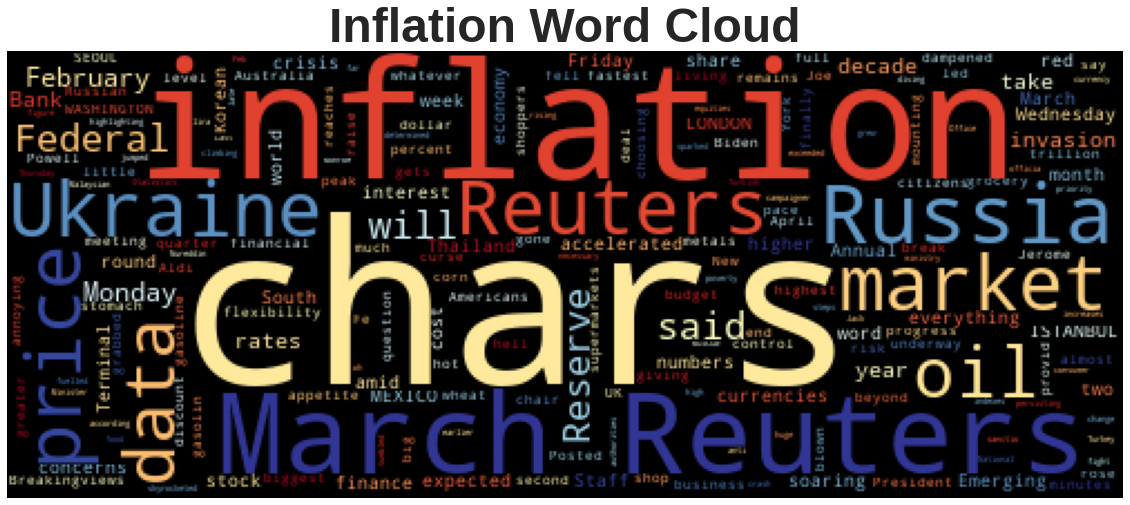

In [71]:
wordcloud(inflation.text.str.cat(), title = 'Inflation Word Cloud')

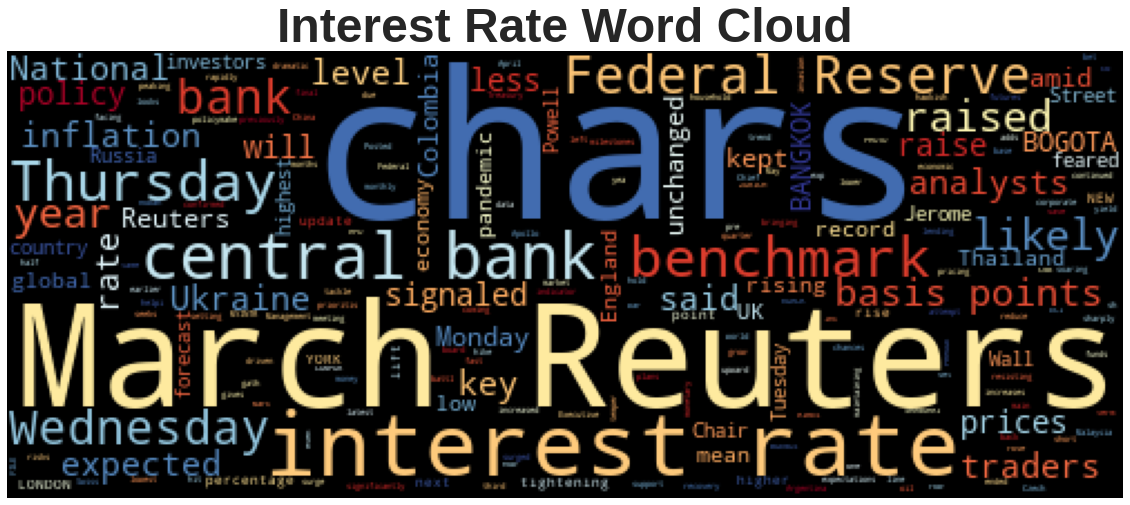

In [72]:
wordcloud(interest_rate.text.str.cat(), title = 'Interest Rate Word Cloud')

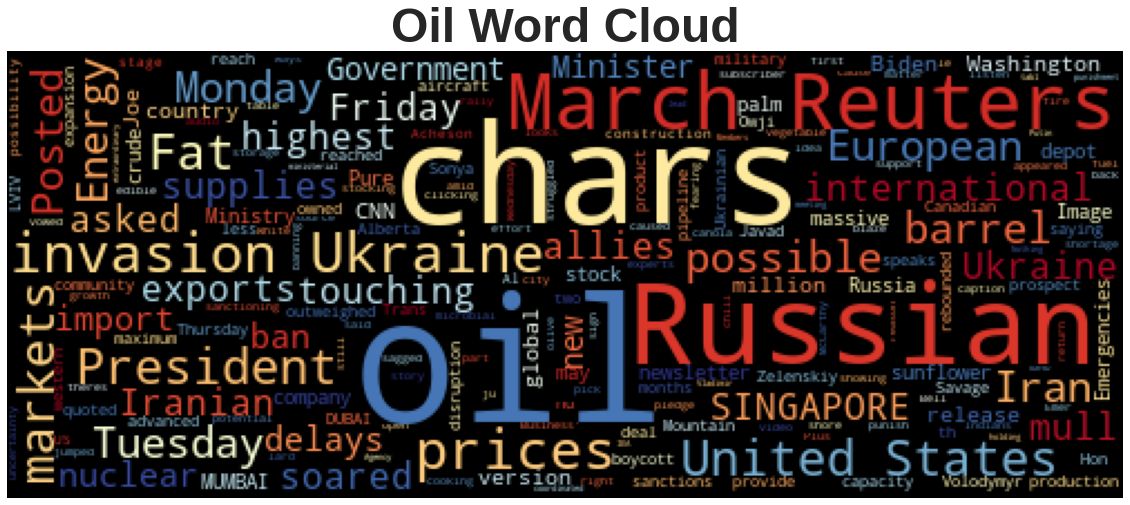

In [73]:
wordcloud(oil.text.str.cat(), title = 'Oil Word Cloud')

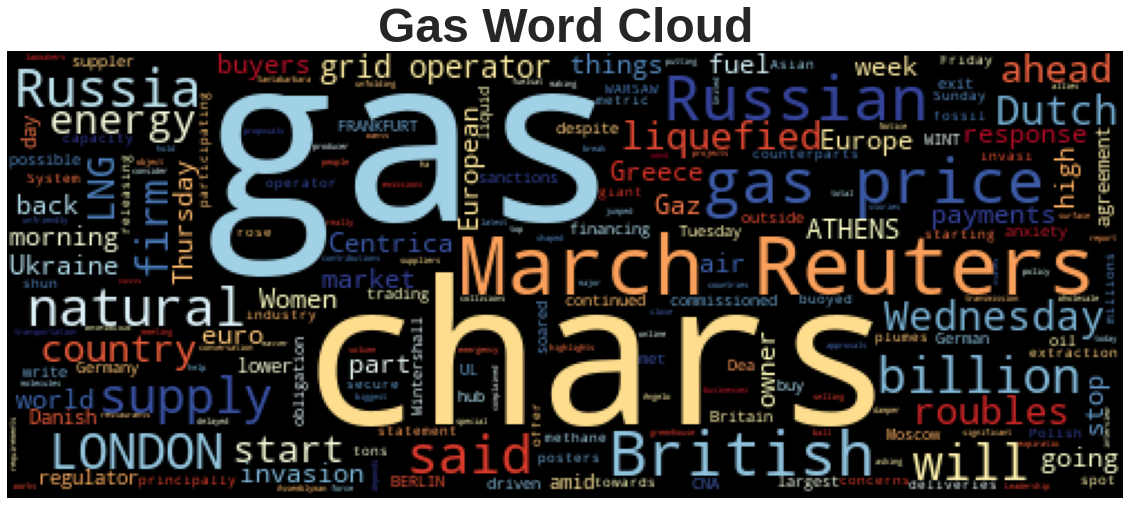

In [74]:
wordcloud(gas.text.str.cat(), title = 'Gas Word Cloud')

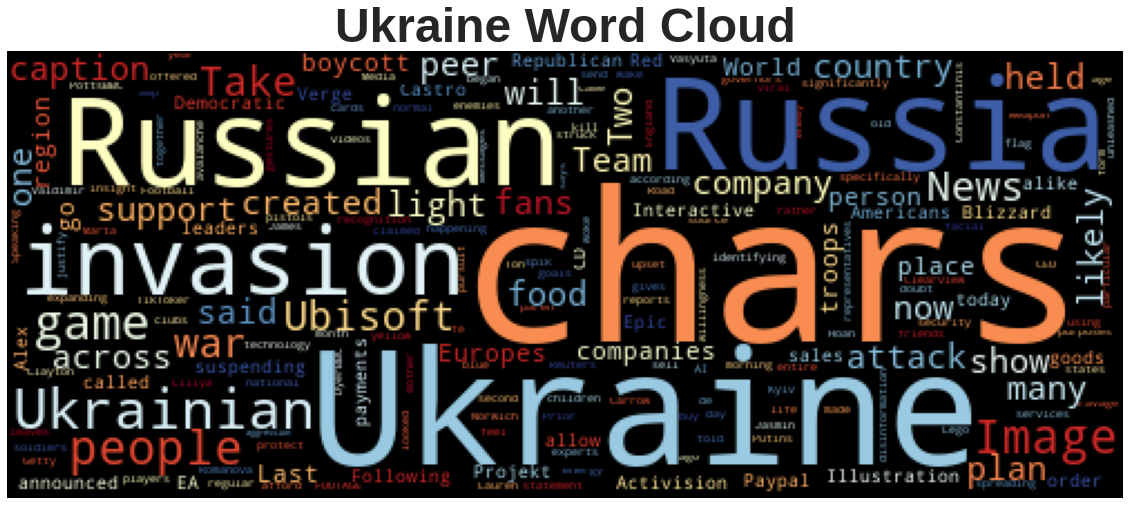

In [75]:
wordcloud(ukraine.text.str.cat(), title = 'Ukraine Word Cloud')

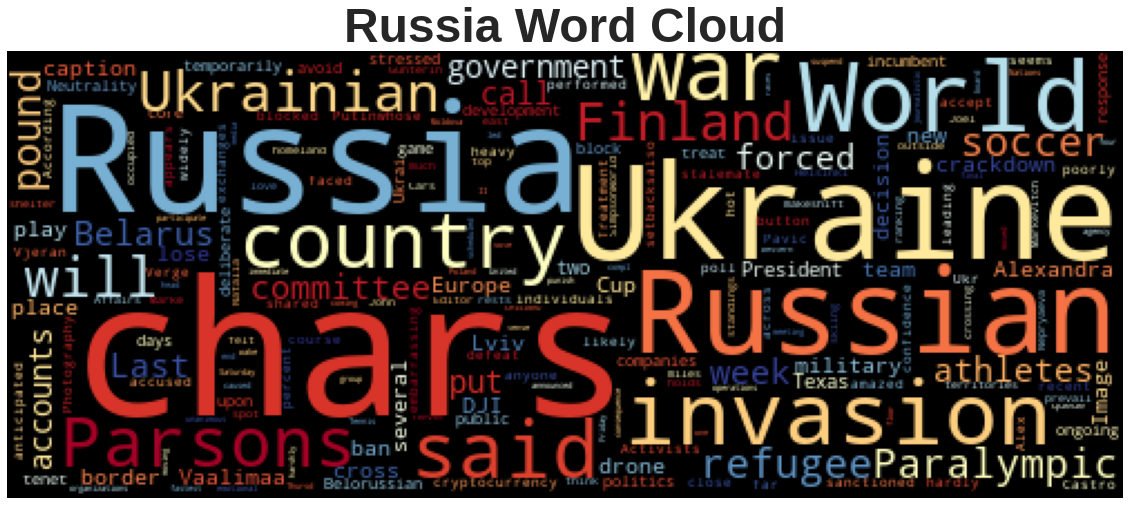

In [76]:
wordcloud(russia.text.str.cat(), title = 'Russia Word Cloud')

In [77]:
# Named Entity Recognition 
# Built a named entity recognition model for all subjects and vuisualized the tags with SpaCy 

In [78]:
# loading the spacy model 
nlp = spacy.load('en_core_web_sm')

In [79]:
# Inflation NER

In [80]:
# concatenated all inflation text together
all_inflation_text = inflation.text.str.cat()
all_inflation_text

'Posted \r\nFrom soaring prices for oil, metals and almost everything else, to a trillion-dollar budget deal, we round up the big numbers in business and finance over the week to March 11.SEOUL, March 11 (Reuters) - Round-up of South Korean financial markets:\r\n** South Korean shares fell on Friday, as red-hot U.S. inflation data dampened risk appetite, while little progress in Russia-… [+1968 chars]WASHINGTON, March 10 (Reuters Breakingviews) - Americans are giving President Joe Biden a break on inflation. Russia\'s invasion of Ukraine has led U.S. citizens to say they can stomach higher gasolin… [+1698 chars]By Reuters Staff\r\nMarch 3 (Reuters) - The Federal Reserve has the flexibility to raise interest rates further if inflation remains higher than expected at the end of this year and beyond, New York Fe… [+494 chars]4. The Federal Reserve chair, Jerome Powell, said hell do whatever it takes to control inflation. How much will it take?\r\nInflation rose to 7.9 percent in February,

In [81]:
# ran the NER processor on all text 
inflation_doc = nlp(all_inflation_text)
# title for document 
inflation_doc.user_data['title'] = 'Inflation NER'

In [82]:
# create visualization 
displacy.render(inflation_doc, style='ent', jupyter=True)

In [83]:
# list of all entities 
for ent in inflation_doc.ents:
  print((ent.text, ent.label_))

('trillion-dollar', 'MONEY')
('the week to March 11.SEOUL, March 11', 'DATE')
('Reuters', 'ORG')
('South Korean', 'NORP')
('South Korean', 'NORP')
('Friday', 'DATE')
('U.S.', 'GPE')
('Russia-', 'ORG')
('March 10', 'DATE')
('Reuters Breakingviews', 'ORG')
('Americans', 'NORP')
('Joe Biden', 'PERSON')
('Russia', 'GPE')
('Ukraine', 'GPE')
('U.S.', 'GPE')
('gasolin', 'PERSON')
('Reuters', 'ORG')
('March 3', 'DATE')
('Reuters', 'ORG')
('The Federal Reserve', 'ORG')
('the end of this year', 'DATE')
('New York Fe', 'ORG')
('chars]4', 'PRODUCT')
('The Federal Reserve', 'ORG')
('Jerome Powell', 'PERSON')
('7.9 percent', 'PERCENT')
('February', 'DATE')
('decades', 'DATE')
('Reuters', 'ORG')
('the second quarter', 'DATE')
('Federal Reserve', 'ORG')
('a Reserve Bank of Australia', 'ORG')
('a decade', 'DATE')
('Russian', 'NORP')
('Ukraine', 'GPE')
('chars]Last month', 'DATE')
('Jack Monroe', 'PERSON')
('the Office for National Statistics', 'ORG')
('5.4%', 'PERCENT')
('March 2', 'DATE')
('Reuters', 

In [84]:
# Interest Rate NER 

In [89]:
all_interest_rate_text = interest_rate.text.str.cat()
all_interest_rate_text

"BOGOTA, March 31 (Reuters) - Colombia's central bank board raised the benchmark interest rate by 100 basis points to 5% on Thursday, significantly lower than expected even amid continued increases in… [+2156 chars]SHANGHAI, March 21 (Reuters) - China kept its benchmark interest rate for corporate and household lending unchanged at its monthly setting on Monday, as expected by traders and analysts.\r\nThe one-yea… [+528 chars]BANGKOK, March 30 (Reuters) - Thailand's central bank left its key interest rate unchanged at a record low on Wednesday, maintaining support for a pandemic-hit economy facing global risks.\r\nIt reduce… [+2124 chars]The Bank of England has increased interest rates to 0.75% in an attempt to tackle rising inflation in the UK. That means the base rate is back to its pre-pandemic level. What does it mean for UK save… [+5587 chars]KUALA LUMPUR, March 3 (Reuters) - Malaysia's central bank kept its benchmark interest rate (MYINTR=ECI) at a record low on Thursday, in line

In [90]:
interest_rate_doc = nlp(all_interest_rate_text)
interest_rate_doc.user_data['title'] = 'Interest Rate NER'

In [94]:
displacy.render(interest_rate_doc, style='ent', jupyter=True)

In [95]:
for ent in interest_rate_doc.ents:
  print(ent.text, ent.label_)

BOGOTA ORG
March 31 DATE
Reuters ORG
100 CARDINAL
5% PERCENT
Thursday DATE
March 21 DATE
Reuters ORG
China GPE
monthly DATE
Monday DATE
one-yea QUANTITY
March 30 DATE
Reuters ORG
Wednesday DATE
+2124 chars]The Bank of England ORG
0.75% PERCENT
UK GPE
UK GPE
LUMPUR ORG
March 3 DATE
Reuters ORG
Malaysia GPE
ECI PERSON
Thursday DATE
2 CARDINAL
Reuters ORG
Marc Rowan PERSON
Tuesday DATE
Russia GPE
Ukraine GPE
AIRES ORG
March 29 DATE
Reuters ORG
Argentina GPE
between 150 and 350 CARDINAL
April DATE
March 31 DATE
Reuters ORG
The Czech National Bank ORG
Thursday DATE
50 CARDINAL
5.00% PERCENT
2001 DATE
Wednesday DATE
Federal Reserve ORG
Jerome Powell PERSON
March 28 DATE
Reuters ORG
3.0%-3.5% PERCENT
this year DATE
Russia GPE
Ukraine GPE
16 CARDINAL
Reuters ORG
The Federal Reserve ORG
Wednesday DATE
a quarter CARDINAL
the coming months DATE
Wednesday DATE
Federal Reserve ORG
Jerome Powell PERSON
March 22 DATE
Reuters ORG
The Swiss National Bank ORG
Thursday DATE
March 14 DATE
Reuters ORG
U.S.

In [85]:
# Oil NER

In [98]:
oil_text = oil.text.str.cat()
oil_text

'SINGAPORE, March 4 (Reuters) - Oil prices rebounded on Friday as the disruption of Russian oil exports because of western sanctions outweighed the prospect of more Iranian supplies from a possible nu… [+2276 chars]LVIV, Ukraine March 7 (Reuters) - Ukrainian President Volodymyr Zelenskiy asked the international community on Monday to provide Ukraine with military aircraft and to boycott Russian oil, oil product… [+410 chars]SINGAPORE, March 7 (Reuters) - Oil prices soared more than 6%, touching their highest since 2008 on Monday after the United States and European allies mull a Russian oil import ban while delays in th… [+4346 chars]DUBAI, March 3 (Reuters) - Iranian oil production capacity can reach its maximum less than two months after a nuclear deal is reached, Oil Minister Javad Owji was quoted as saying on Thursday.\r\nIran … [+989 chars]Hon. Sonya Savage, Minister of Energy, Government of Alberta, speaks at the expansion of the Canadian government-owned Trans Mountain oil pipel

In [99]:
oil_doc = nlp(oil_text)
oil_doc.user_data['title'] = 'Oil NER'

In [100]:
displacy.render(oil_doc, style='ent', jupyter=True)

In [101]:
for ent in oil_doc.ents:
  print(ent.text, ent.label_)

SINGAPORE ORG
March 4 DATE
Reuters ORG
Friday DATE
Russian NORP
Iranian NORP
Ukraine GPE
March 7 DATE
Reuters ORG
Ukrainian NORP
Volodymyr Zelenskiy PERSON
Monday DATE
Ukraine GPE
Russian NORP
March 7 DATE
Reuters ORG
more than 6% PERCENT
2008 DATE
Monday DATE
the United States GPE
European NORP
Russian NORP
March 3 DATE
Reuters ORG
Iranian NORP
less than two months DATE
Javad Owji PERSON
Thursday DATE
Iran GPE
Sonya Savage PERSON
Energy, Government ORG
Alberta GPE
Canadian NORP
Trans Mountain LOC
Acheson GPE
US GPE
Russian NORP
Joe Biden PERSON
Ukraine GPE
White H FAC
March 1 DATE
Reuters ORG
The United States GPE
Tuesday DATE
30 million barrels QUANTITY
a global 60 million barrel pledge QUANTITY
first ORDINAL
Bell ORG
Russian Emergencies Ministry
Image ORG
The Russian Emergencies Ministry ORG
Russian LANGUAGE
March 7 DATE
Reuters ORG
Indians NORP
Russia GPE
Ukraine GPE
European NORP
above $100 MONEY
Tuesday DATE
Russia GPE
Ukraine GPE
Emer McCarthy PERSON
more than 9% PERCENT
Monday 

In [102]:
# Gas NER

In [103]:
gas_text = gas.text.str.cat()
gas_text

'FRANKFURT, March 2 (Reuters) - German oil and gas firm Wintershall Dea (WINT.UL) said on Wednesday it would stop payments to Russia and write off its 1 billion euro ($1.1 billion) financing in the No… [+1858 chars]March 2 (Reuters) - British and Dutch gas prices soared over 30% on Wednesday morning, driven by anxiety over the continued supply of Russian gas and possible sanctions in response to the invasion of… [+2125 chars]BERLIN, March 2 (Reuters) - Germany has commissioned its gas market trading hub to buy natural liquid gas for 1.5 billion euros ($1.66 billion) outside Russia despite Moscow having met all obligation… [+491 chars]LONDON, March 1 (Reuters) - Centrica (CNA.L), owner of Britain\'s largest energy suppler British Gas, said on Tuesday it would exit its gas supply agreements with Russian counterparts, principally Gaz… [+891 chars]LONDON, March 4 (Reuters) - Asian spot liquefied natural gas (LNG) prices rose this week, buoyed by concerns over Russian supply to Europe as bu

In [104]:
gas_doc = nlp(gas_text)
gas_doc.user_data['title'] = 'Gas NER'

In [105]:
displacy.render(gas_doc, style='ent', jupyter=True)

In [106]:
for ent in gas_doc.ents:
  print(ent.text, ent.label_)

FRANKFURT ORG
March 2 DATE
Reuters ORG
) - NORP
Wintershall Dea PERSON
WINT.UL PERSON
Wednesday DATE
Russia GPE
1 billion euro MONEY
$1.1 billion MONEY
Reuters ORG
British NORP
Dutch NORP
over 30% PERCENT
Wednesday DATE
morning TIME
Russian NORP
March 2 DATE
Reuters ORG
Germany GPE
1.5 billion euros MONEY
$1.66 billion MONEY
Russia GPE
Moscow GPE
March 1 DATE
Reuters ORG
Britain GPE
British Gas ORG
Tuesday DATE
Russian NORP
Gaz PERSON
March 4 DATE
Reuters ORG
Asian NORP
this week DATE
Russian NORP
Europe LOC
Russian NORP
LNG ORG
March 4 DATE
Reuters ORG
Gaz-System ORG
Ukraine GPE
Sunday DATE
Friday DATE
chars]7 PRODUCT
7 CARDINAL
millions of metric tons QUANTITY
Angelo Santabarbara PERSON
today DATE
March 23 DATE
Reuters ORG
British NORP
Dutch NORP
Wednesday DATE
Russia GPE
the European U ORG
March 24 DATE
Reuters ORG
U.S. GPE
Thursday DATE
March 30 DATE
Reuters ORG
25 CARDINAL
Reuters ORG
The United States GPE
Europe LOC
Russian NORP
March 30 DATE
Reuters ORG
Greek NORP
Greece GPE
Rus

In [107]:
# Ukraine NER

In [108]:
ukraine_text = ukraine.text.str.cat()
ukraine_text

'Following EA Games, CD Projekt Red, Activision Blizzard, and Epic Games\r\nIllustration by Alex Castro / The Verge\r\nUbisoft and Take-Two Interactive are suspending game sales in Russia in light of its … [+1588 chars]In light of the Russian invasion of Ukraine, many Americans have called for boycotts of Russian goods in order to show their support for the Ukrainian people. Republican and Democratic leaders alike … [+4916 chars]Paypal will now allow peer-to-peer payments to and from Ukraine. The company announced today that it was significantly expanding its services in Ukraine in the wake of Russias invasion. Prior to this… [+1510 chars]Ukraine\r\n is now using Clearview AI\'s\r\n facial recognition technology for purposes such as identifying Russian soldiers, its CEO claimed. Hoan Ton-That told Reuters\r\n the company offered Ukraine\'s de… [+1642 chars]We can protect our national energy security and sell to our friends rather than buy from our enemies specifically Russia, the gover

In [109]:
ukraine_doc = nlp(ukraine_text)
ukraine_doc.user_data['title'] = 'Ukraine NER'

In [110]:
displacy.render(ukraine_doc, style='ent', jupyter=True)

In [111]:
for ent in ukraine_doc.ents:
  print(ent.text, ent.label_)

Epic Games
Illustration ORG
Alex Castro PERSON
Russia GPE
Russian NORP
Ukraine GPE
Americans NORP
Russian NORP
Ukrainian NORP
Republican NORP
Democratic NORP
Ukraine GPE
today DATE
Ukraine GPE
Russias NORP
Clearview AI's ORG
Russian NORP
Hoan Ton-That PERSON
Reuters
  ORG
Ukraine GPE
Russia GPE
Ukrainian NORP
Lego GPE
the second day DATE
Kyiv Liliya Romanova EVENT
Lauren PottsBBC FAC
Constantinis/Getty Images
 ORG
Ukraine GPE
this morning TIME
James Clayton PERSON
Jasmin GPE
Ukraine GPE
TikToker ORG
Ukrainian NORP
Ukrainian NORP
Carrow Road
Football ORG
England GPE
Ukraine GPE
RUSSIAS ORG
Ukraine GPE
Valdimir Putins PERSON
one CARDINAL
Ukraine GPE
a month ago DATE
Russia GPE
Ukraine GPE
Russian NORP
Ukraine GPE
Russia GPE
Ubisoft
  GPE
Ukraine GPE
Monday DATE
Ubisoft ORG
chars]Last week DATE
Ukrainian NORP
Russian NORP
Belorussian NORP
Russia GPE
Ukrai GPE
Satoshi Nakamoto PERSON
Bitcoin GPE
2008 DATE
early Friday DATE
Ukraine GPE
Russian NORP
Russian NORP
Russia GPE
four CARDINAL
one 

In [112]:
# Russia NER

In [113]:
russia_text = russia.text.str.cat()
russia_text

'For days, as the invasion forced the Paralympics committee to deliberate how it would treat athletes from Russia and Belarus, Parsons stressed that it was incumbent upon the I.P.C. to avoid politics … [+843 chars]Last week, the Ukrainian government put out a public call to all game development companies to temporarily block all Russian and Belorussian accounts in response to Russia\'s ongoing invasion of Ukrai… [+3977 chars]Neutrality is a core tenet of cryptocurrency. But in the course of the war in Ukraine, exchanges have blocked accounts of sanctioned Russian individuals and those close to them. Activists have also u… [+3389 chars]However, Putinwhose military has performed far more poorly in Ukraine than anyone anticipated and has faced heavy, embarrassing setbacksalso hardly seems likely to accept defeat or a stalemate in Ukr… [+3046 chars]Photography by Vjeran Pavic / Treatment by Alex Castro / The Verge\r\n\n \n\n\n Why DJI’s drones are a hot-button issue in the Ukraine-Russia w

In [114]:
russia_doc = nlp(russia_text)
russia_doc.user_data['title'] = 'Russia NER'

In [115]:
displacy.render(russia_doc, style='ent', jupyter=True)

In [116]:
for ent in russia_doc.ents:
  print(ent.text, ent.label_)

days DATE
Paralympics ORG
Russia GPE
Belarus GPE
I.P.C. GPE
chars]Last week DATE
Ukrainian NORP
Russian NORP
Belorussian NORP
Russia GPE
Ukrai GPE
Ukraine GPE
Russian NORP
Ukraine GPE
Ukr… GPE
Vjeran Pavic PERSON
Alex Castro PERSON
The Verge

 


  PERSON
DJI ORG
Ukraine GPE
Russia GPE
Last week DATE
Ukraine GPE
DJI ORG
70 percent PERCENT
Ukrainians NORP
Russian NORP
John SimpsonWorld Affairs Editor ORG
Vaalimaa GPE
Finland
 ORG
Finland GPE
Vaalimaa GPE
Finland GPE
Russia GPE
120 miles QUANTITY
Helsinki GPE
Joel Gunterin Lviv PERSON
Ukraine
 ORG
Alexandra Markevitch PERSON
Lviv GPE
Ukraine GPE
Alexandra Marke PERSON
Natalia Nepryaeva PERSON
Russia GPE
the World Cup EVENT
Russia GPE
Belarus GPE
Parsons PERSON
Thursd PERSON
Moldova Russias PERSON
Ukraine GPE
Europe LOC
World War II EVENT
United Nations ORG
Saturday DATE
Russia GPE
four CARDINAL
one CARDINAL
the World Cup EVENT
Poland GPE
Russia GPE
Friday DATE
Russia GPE
Vladimir V. Putins PERSON
+1011 ORG
Russian LANGUAGE
Ukraine GPE
ch